# Introduction to Data Visualization with Pyhon

Changing the working directory

In [1]:
cd C:\TUSHIAZ\pyPRO\Datasets

C:\TUSHIAZ\pyPRO\Datasets


Importing the necessary packages

In [2]:
## Importing the  Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Profiling  package
from pandas_profiling import ProfileReport

#setting up the graphycal environment
#pyoff.init_notebook_mode()
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

C:\Users\DMuturi\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('Students Data.csv')
df.head()

,YearofStudy,Course,Age,ApproxHeight,ApproxWeight,KCSE,Yr_JoinCampus,SitKCSE,Expense_Semester,Expense_Accommodation,Previous_Exam_MeanGrade
0,Second Year,MATHEMATICS,20,152,80,2016,2018,Central,8744,6043,B
1,First Year,ECONOMICS AND STATISTICS,29,182,79,2010,2010,Rift Valley,26293,14782,B
2,Fourth Year,MATHEMATICS,22,167,64,2015,2016,Western,44105,19224,B
3,Second Year,ECONOMICS AND STATISTICS,23,149,52,2016,2018,Coast,33954,18795,B
4,Second Year,MATHEMATICS,18,150,70,2013,2018,Western,18113,25569,A


## Producing summary reports with pandas Profiling module
Pandas profilling is one of my favourites analytical tools. Pandas Profilling comes in handy for quick exploratory data analysis. It requires just a few lines of code to generate a comprehensive report with statistical summaries that helps to understand the dataset, its variables and relationships between them. The reports are interactive in webformats(HTML) and can easly be shared with others even if they dont know how to code:

Lets generate a report from our data

In [4]:
ProfileReport(df)

to export the report into an interactive format [HTML File] , you just need to write the following code

In [5]:
report=ProfileReport(df)
report.to_file("students_data_report.html")

## Pandas visualization
Pandas is a very useful package when it comes to data handling and manipulation. Its strengths extends to making basic visualization charts. Using pandas, one can create beautifull plots from Pandas dataframes and series. 

## i. Scatter plots

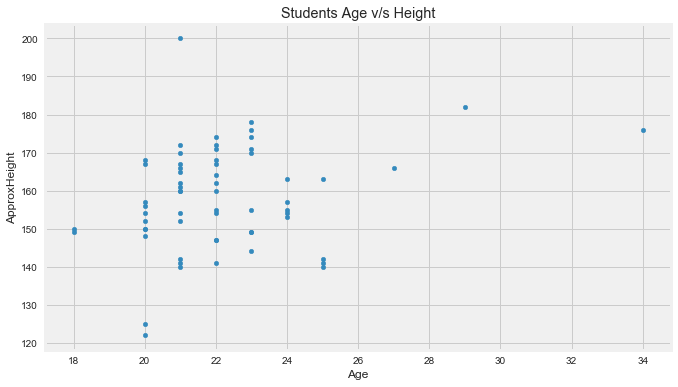

In [6]:
df.plot.scatter(x='Age',y='ApproxHeight',title='Students Age v/s Height',figsize=(10,6))

Alternatively

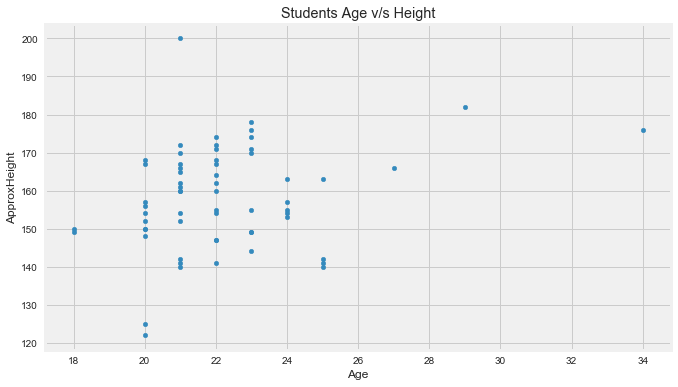

In [7]:
df.plot(x='Age',y='ApproxHeight',kind='scatter',title='Students Age v/s Height',figsize=(10,6))

### ii. Line Charts

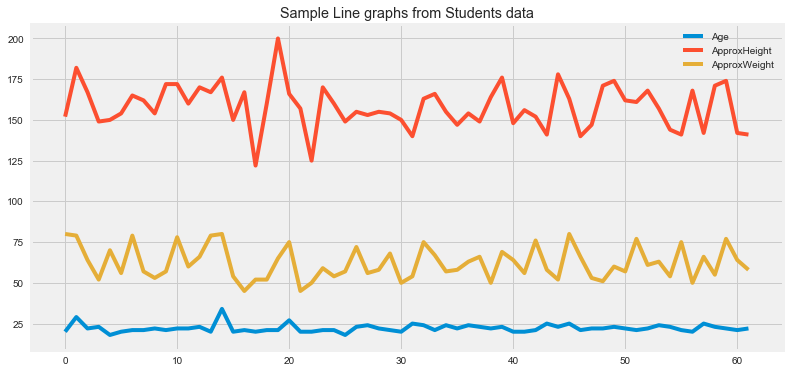

In [8]:
df.loc[:,["Age","ApproxHeight","ApproxWeight"]].plot(kind='line',figsize=(12,6),
                                                     title="Sample Line graphs from Students data")

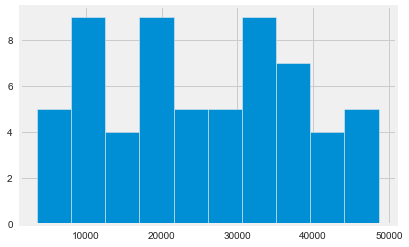

In [9]:
df['Expense_Accommodation'].hist(bins=10)

#### Creating multiple histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF013F6A20>,
      dtype=object)

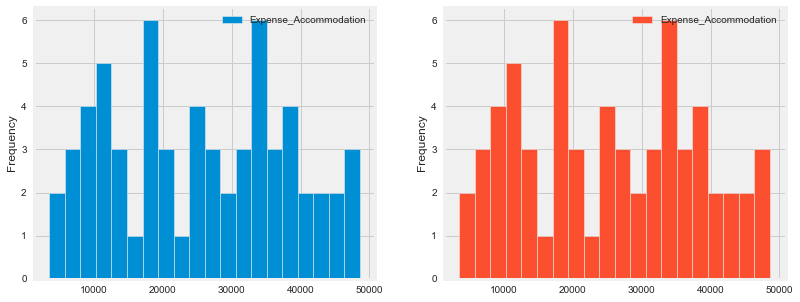

In [10]:
plot_data=df.loc[:,["Expense_Accommodation","Expense_Accommodation"]]
plot_data.plot(subplots=True, layout=(1,2),figsize=(12,5),bins=20,kind='hist')

#### Bar Chats

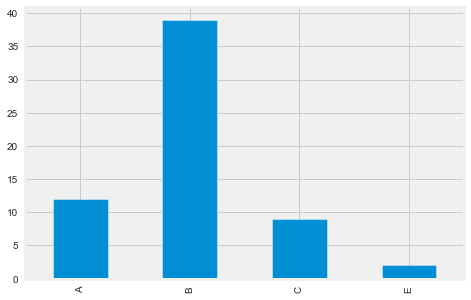

In [11]:
df['Previous_Exam_MeanGrade'].value_counts().sort_index().plot(kind='bar',figsize=(7,5))

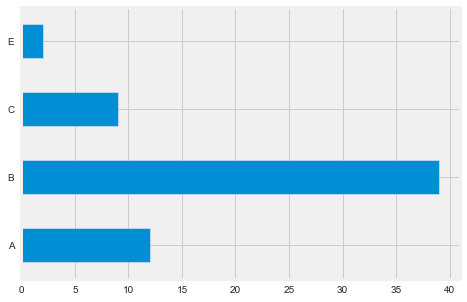

In [12]:
df['Previous_Exam_MeanGrade'].value_counts().sort_index().plot(kind='barh',figsize=(7,5))

### Matplotlib
Matplotlib is the most common ploting package in python. Its actually the base plotting package in python. Matplotlib gives one the functonality to define and customizing the charts at the expense of writting more cores.

#### Matplotlib Scatter
To create a scatter plot in Matplotlib we can use the scatter function. We will also create a figure and an axis using plt.subplots so we can give our plot a title and labels

Text(0, 0.5, 'Weight')

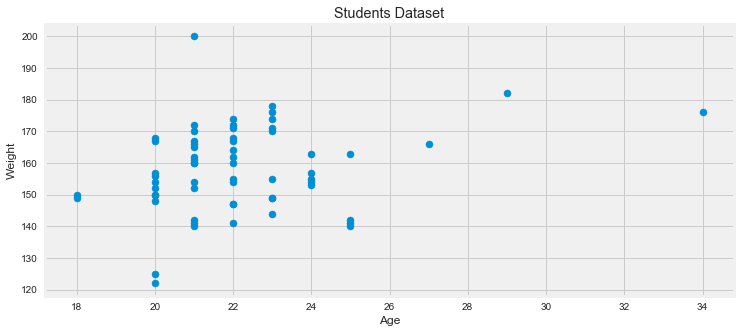

In [13]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(11,5))

# scatter the sepal_length against the sepal_width
ax.scatter(df['Age'], df['ApproxHeight'])
# set a title and labels
ax.set_title('Students Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')

## Line chats

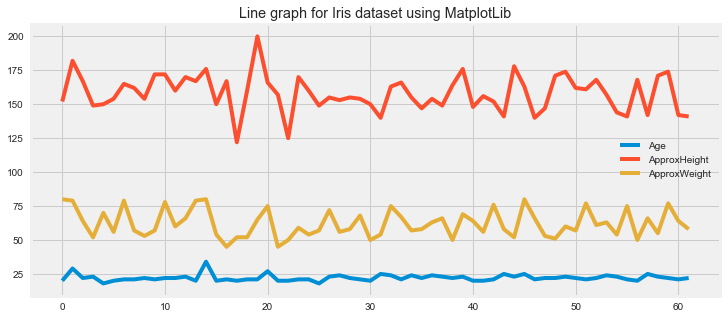

In [14]:
### Getting the plotting columns
cols=["Age","ApproxHeight","ApproxWeight"]

# Create x_axis data
plot_data=range(0,len(df))

# creating the figure and the axis
fig, ax = plt.subplots(figsize=(11,5))

## plot each column
for i in cols:
    ax.plot(plot_data,df[i],label=i)
    
#seting up the graph
ax.set_title('Line graph for Iris dataset using MatplotLib')
ax.legend()

### Histogram

Text(0, 0.5, 'Frequency')

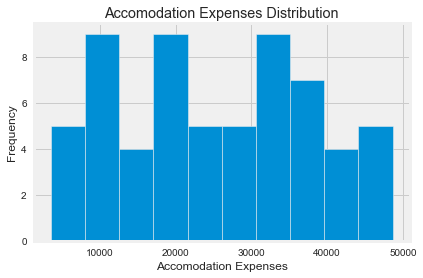

In [15]:
fig, ax = plt.subplots()
ax.hist(df['Expense_Accommodation'])

ax.set_title('Accomodation Expenses Distribution')
ax.set_xlabel('Accomodation Expenses')
ax.set_ylabel('Frequency')

## Bar Charts

Text(0, 0.5, 'Frequency')

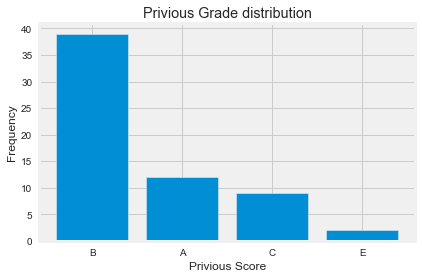

In [16]:
fig, ax = plt.subplots()
#Preparing the data to plot
plot_data=df['Previous_Exam_MeanGrade'].value_counts()

# Geting axis values
Grades=plot_data.index
frequency=plot_data.values

# Creating the graph
ax.bar(Grades,frequency)

# set title and labels 
ax.set_title('Privious Grade distribution') 
ax.set_xlabel('Privious Score') 
ax.set_ylabel('Frequency')

## Seaborn

1. Scatter Plot

Text(0.5, 1.0, 'Scatter plot for expenses against the year of joining campus')

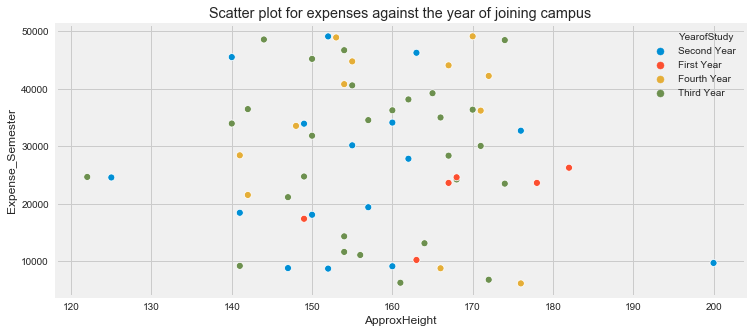

In [17]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='ApproxHeight',y='Expense_Semester',data=df,hue="YearofStudy").set_title("Scatter plot for expenses against the year of joining campus")

## Regresion plots

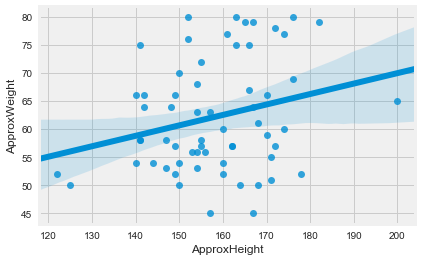

In [18]:
sns.regplot(x="ApproxHeight",y='ApproxWeight',data=df)

### Line Graph

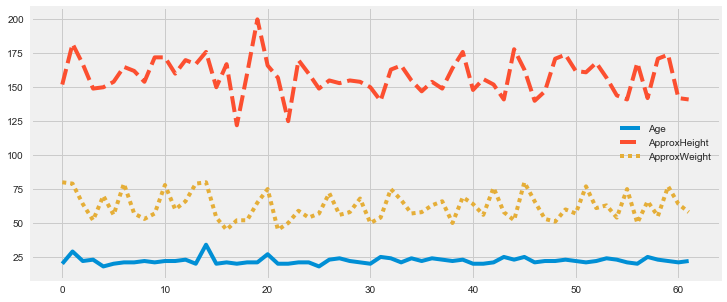

In [19]:
plt.figure(figsize=(11,5))
sns.lineplot(data=df[["Age","ApproxHeight","ApproxWeight"]])

### Histogram

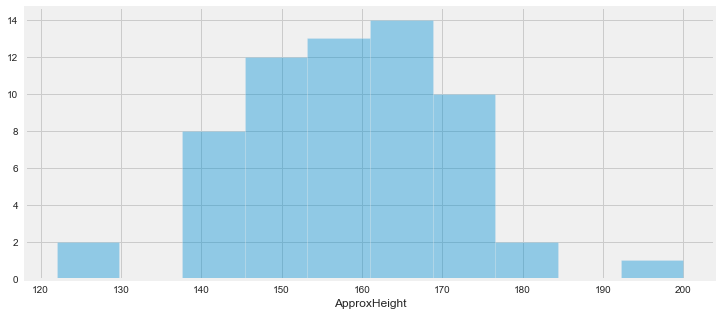

In [20]:
plt.figure(figsize=(11,5))
sns.distplot(df['ApproxHeight'],bins=10,kde=False)

including the density plot

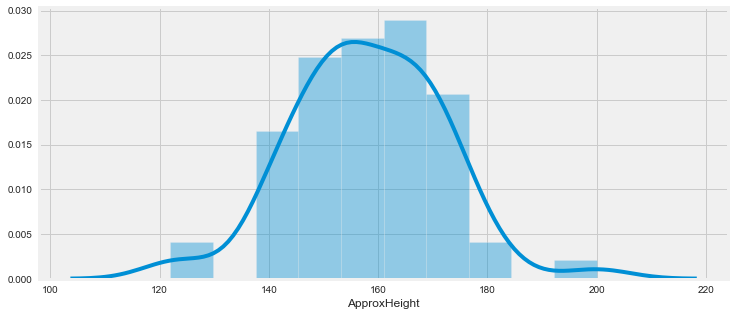

In [21]:
plt.figure(figsize=(11,5))
sns.distplot(df['ApproxHeight'],bins=10,kde=True)

## Bar plots

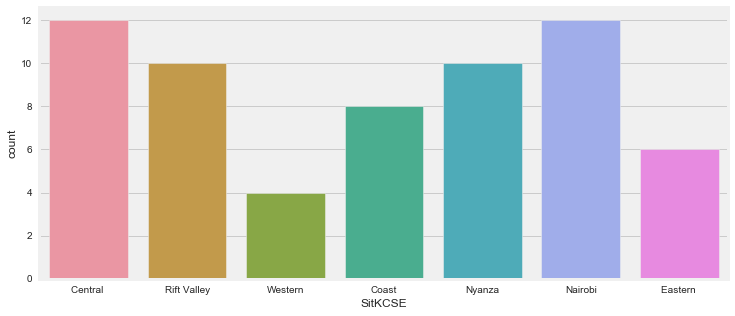

In [22]:
plt.figure(figsize=(11,5))
sns.countplot(df['SitKCSE'])

### Boxplot

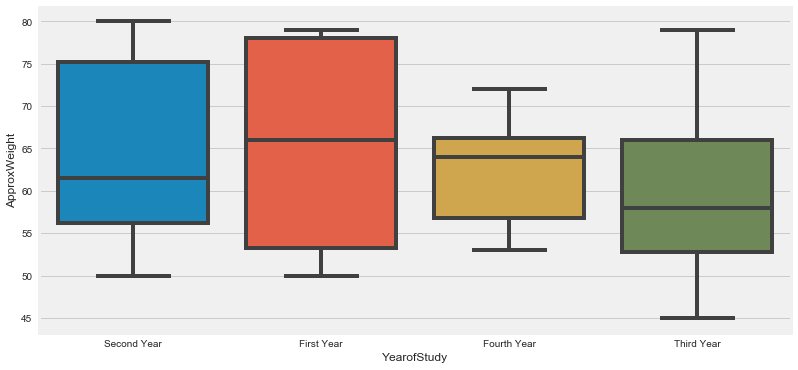

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot('YearofStudy', 'ApproxWeight', data=df)

In [24]:
df.head(3)

,YearofStudy,Course,Age,ApproxHeight,ApproxWeight,KCSE,Yr_JoinCampus,SitKCSE,Expense_Semester,Expense_Accommodation,Previous_Exam_MeanGrade
0,Second Year,MATHEMATICS,20,152,80,2016,2018,Central,8744,6043,B
1,First Year,ECONOMICS AND STATISTICS,29,182,79,2010,2010,Rift Valley,26293,14782,B
2,Fourth Year,MATHEMATICS,22,167,64,2015,2016,Western,44105,19224,B


### Heatmaps

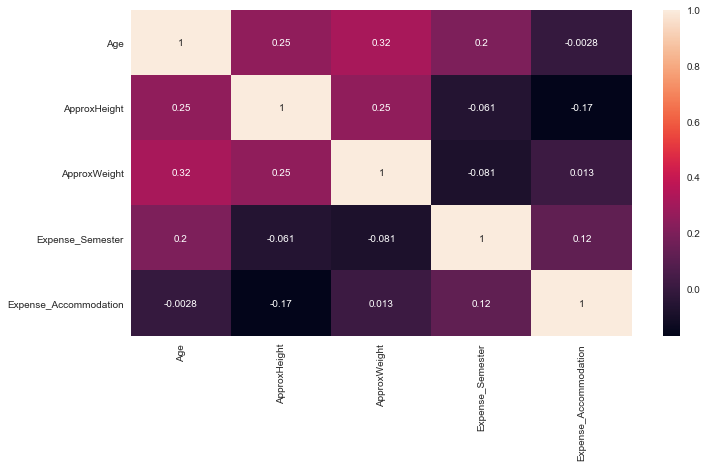

In [25]:
plt.figure(figsize=(10,6))
plt_data=df.loc[:,['Age','ApproxHeight','ApproxWeight','Expense_Semester','Expense_Accommodation']]
sns.heatmap(plt_data.corr(),annot=True)

## Seaborn Pair Plot

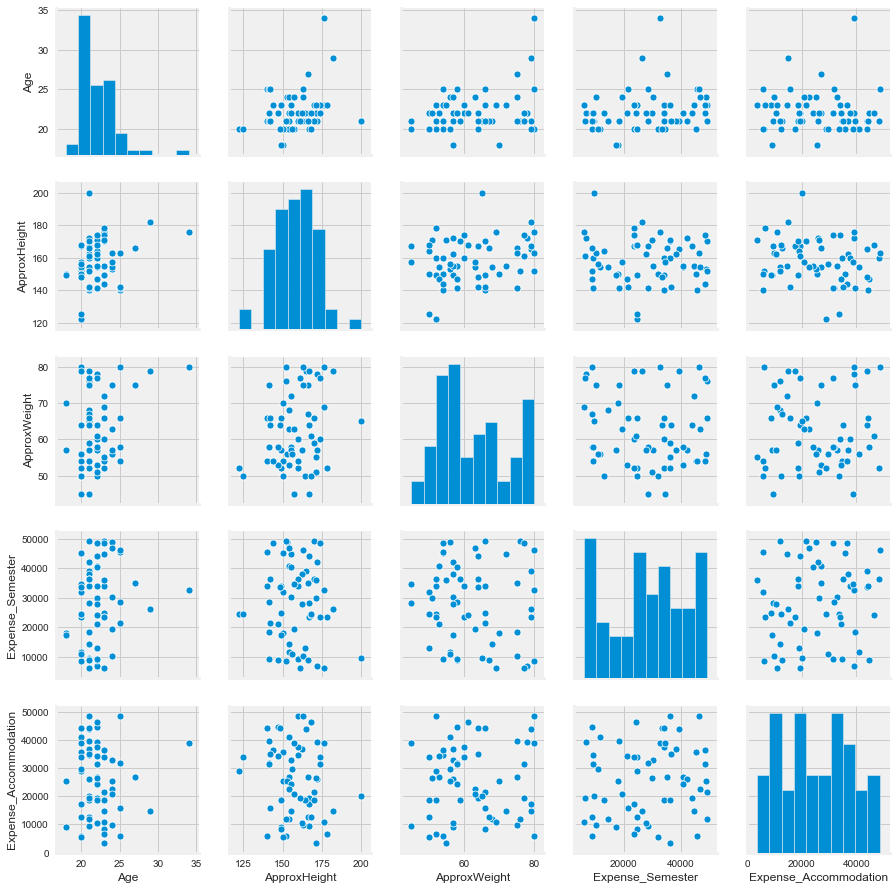

In [26]:
# Pairplots
sns.pairplot(plt_data)

                            DMuturi